# Decision Trees and Random Forest
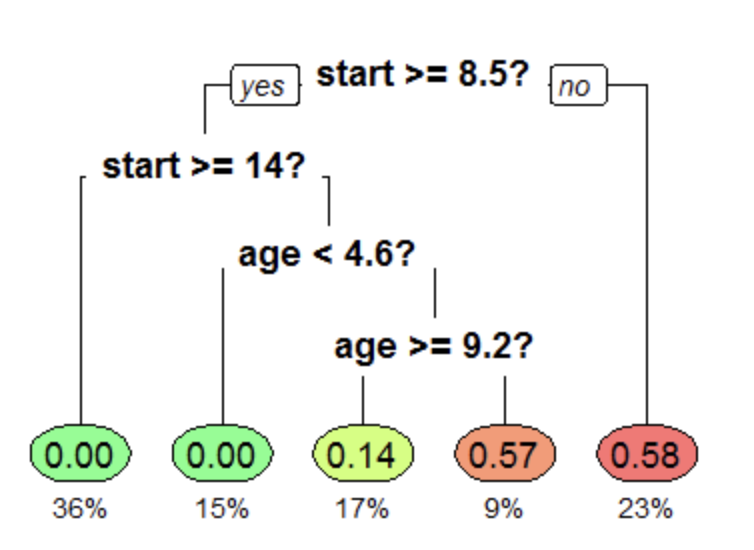

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

First, let's read in the data to see what we're working with...

(we will not use "Number" for this tutorial to keep things simple)

In [8]:
df = pd.read_csv('data/kyphosis.csv').drop('Number', axis=1)
df

,Kyphosis,Age,Start
0,absent,71,5
1,absent,158,14
2,present,128,5
3,absent,2,1
4,absent,1,15
...,...,...,...
76,present,157,13
77,absent,26,13
78,absent,120,13
79,present,42,6


Start with a simple decision tree...

In [9]:
def simple_tree(age, start):

    # first node
    if start < 8.5:
        return np.random.binomial(n=1, p=0.58)
    
    # second node
    if start >= 14:
        return 0
    
    # third node
    if age < 4.6:
        return 0
    
    # fourth node
    if age >= 9.2:
        return np.random.binomial(n=1, p=0.14)

    return np.random.binomial(n=1, p=0.57)

How can we evaluate the accuracy of the model?

In [10]:
kyphosis_pred = []
for data in df.values:
    kyphosis_pred.append(simple_tree(data[1], data[2]))

count = 0
for i in range(len(df)):
    if df.values[i][0] == 'present' and kyphosis_pred[i] == 1:
        count += 1
    if df.values[i][0] == 'absent' and kyphosis_pred[i] == 0:
        count += 1

This model is partly stochastic (random), so let's test the score by repeating the test.

77.8679012345679 3.384083484989555


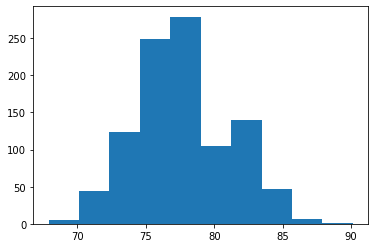

In [11]:
def get_model_accuracy(tree_model):

    kyphosis_pred = []
    for data in df.values:
        kyphosis_pred.append(tree_model(data[1], data[2]))

    count = 0
    for i in range(len(df)):
        if df.values[i][0] == 'present' and kyphosis_pred[i] == 1:
            count += 1
        if df.values[i][0] == 'absent' and kyphosis_pred[i] == 0:
            count += 1
    
    return 100*count/len(df)

runs = 1000
accuracies = np.zeros(runs)
for i in range(runs):
    accuracies[i] = get_model_accuracy(simple_tree)

plt.hist(accuracies)

print(np.mean(accuracies), np.std(accuracies))

now, let's move to a random forest!

In [12]:
X = df.drop(['Kyphosis'], axis = 1)
y = df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest.score(X_test, y_test)

0.9047619047619048

# Hyperparameter Tuning
First, let's check the ideal number of estimators

In [14]:
max_estimators = 500
scores = np.zeros(max_estimators)
for i in np.arange(0, max_estimators, 10):
    sample_scores = np.zeros(25)
    for j in range(25):
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        random_forest = RandomForestClassifier(n_estimators = max_estimators+1)
        random_forest.fit(X_train, y_train)
        sample_scores[j] = random_forest.score(X_test, y_test)
    scores[i] = np.mean(sample_scores)
    print(i)

np.save('estimator_test.npy', scores)
estimator_scores = np.load('estimator_test.npy')
for i in range(len(estimator_scores)):
    if estimator_scores[i] == max(estimator_scores):
        print(i, estimator_scores[i])

plt.plot(np.arange(0, max_estimators, 10), estimator_scores)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350


so, with random forest, we can generally get a better score than with an optimized decision tree alone!